# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.




**1. What makes a model "linear"? "Linear" in what?**

A model is linear as long as the coefficients, $b$, enter the prediction as
$$
\hat{y} = b \cdot \hat{x} = b_1 \hat{x}_1 + b_2 \hat{x}_2 + ... b_J \hat{x}_J
$$
so that the relationship between $\hat{y}$ and each $\hat{x}_j$ is a linear one through $b_j$
- Taking non-linear transformations of the $x_j$'s simply gives new variables, like $\log(x_j)$ or $x_j^2$ -- *Transformations of the regressors don't make the model nonlinear*
- Likewise, if there was a coefficient written in a funky nonlinear way, like $\sqrt{ \text{asinh}(b_j)}$, you can simply relabel that coefficient as $b_j \leftarrow \sqrt{ \text{asinh}(b_j)}$ and make the model linear again.

So, a model is considered "linear" when it is linear in its parameters. For example:

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

is linear because the weights $b_k$ enter the model in a multiplicative way with its respective $x_k$. 

Linear models optimally weight the explanatory variables in order to predict the outcome variable. Each weight $b_k$ allows the variable $x_k$ to have some impact on the predicted y. 

For it to go well, you need to think about interesting features to add, why they are useful, and how to optimally transform/engineer them. The choice of variables to include is a hyperparameter in a linear model like k was a hyperparameter in a k-NN model.

They are extremely powerful and easily interpreted tools. 


**2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)**

Assuming you dropped the first dummy variable to avoid the dummy variable trap and multicolinearity, the coefficient b of the one-hot-encoded variable will give you an interpretation for the average difference between when the dummy variable is 1 compared to when it is 0, holding all other variables constant. The coefficient is the average marginal effect of the dummy on y ceteris paribus. If you wanted to interpret it for the dummy variable == 0, the intercept represents the average value of y when the dummy variable and all other variables are 0. 

If you dropped the intercept and kept all dummies, each dummy coefficient shows the mean of the dependent variable for that category. 

**3. Can linear regression be used for classification? Explain why, or why not.**

No, linear regression is not fit for classification. Classification imposes additional restrictions on the environment that cannot always be satisfied by a linear model. You could make it a binary 0/1 outcome so that you predict the probability of something occuring, but OLS might predict values less than zero or greater than one.   You could get outcomes like -2.3 or 5.6, and while that may seem like it works, it does not work well for all datasets especially with outliers. That is why it is better to use logistic regression or kNN, k-MC, trees, etc. for classification tasks. Linear regression is designed for predicting numeric continuous variables. 


**4. What are signs that your linear model is over-fitting?**

You run into significant danger of overfitting the more complex the feature space (combo of interaction terms, polynomial families, log transformations, max-min normalization, PCA, too many variables, etc.) If you are using dozens or thousands of variables with interaction terms and such, you are probably overfitting. 

**5. Clearly explain multi-colinearity using the two-stage least squares technique.**

Multicolinearity is when one predictor in the model is too similar to the other predictors so it is hard to tell which is actually influencing the outcome (unstable coefficient estimates, large standard errors, difficult to isolate individual variable effects). You can use 2SLS to see if a predictor actually has an independent effect on y. 

Stage 1: predict y using everything except $x_k$. Save the residuals 

Stage 2: predict $x_k$ (predictor k) using all the other predictors. Save the residuals

Plot the residuals against one another. This is the variation in Y being explained by $x_k$ (the partial correlation between $x_k$ and y with the influence of other variables removed). If it is high correlation, then $x_k$ has a meaningful impact on y. If not, multicolinearity is a serious issue. 


**6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?**

You can incorporate nonlinear relationships between your response variable and your indepdent variables into your analysis through transformations of the regresssors. Taking non-linear transformations of the $x_j$'s simply gives new variables, like $\log(x_j)$ or $x_j^2$ -- *So, Transformations of the regressors don't make the model nonlinear.*

Likewise, if there was a coefficient written in a funky nonlinear way, like $\sqrt{ \text{asinh}(b_j)}$, you can simply relabel that coefficient as $b_j \leftarrow \sqrt{ \text{asinh}(b_j)}$ and make the model linear again.

As long as the coefficients, $b$, enter the prediction as
$$
\hat{y} = b \cdot \hat{x} = b_1 \hat{x}_1 + b_2 \hat{x}_2 + ... b_J \hat{x}_J
$$
the model is linear.


7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

In the context of linear models, the interpretation of the intercept is that it is the predicted value of y when all other variables are 0. 

The interpretation of a slope coefficient for a variable in a linear model is the change in y for a one-unit increase in the variable holding all other variables constant. Put differently, it is the marginal effect of that variable. For each one unit increase in $x_k$, y changes by $b_k$ units. 


Assuming you dropped the first dummy variable to avoid the dummy variable trap and multicolinearity, the coefficient b of the one-hot-encoded variable will give you an interpretation for the average difference between when the dummy variable is 1 compared to when it is 0, holding all other variables constant. The coefficient is the average marginal effect of the dummy on y ceteris paribus. If you wanted to interpret it for the dummy variable == 0, the intercept represents the average value of y when the dummy variable and all other variables are 0. 

If you dropped the intercept and kept all dummies, each dummy coefficient shows the mean of the dependent variable for that category. 

**Q2.** Load `./data/Q1_clean.csv`. 

In [2]:
import pandas as pd
Q2 = pd.read_csv("/Users/isaactabor/linearModels/assignment/data/Q1_clean.csv")


The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [3]:
print(Q2.columns)
print(Q2.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean().rename(columns={
    'Price': 'Average Price', 
    'Score': 'Average Review Score'
})
.reset_index())


Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')
  Neighbourhood   Average Price  Review Scores Rating
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


In [4]:
import numpy as np
Q2['Log Price'] = np.log(Q2['Price'])


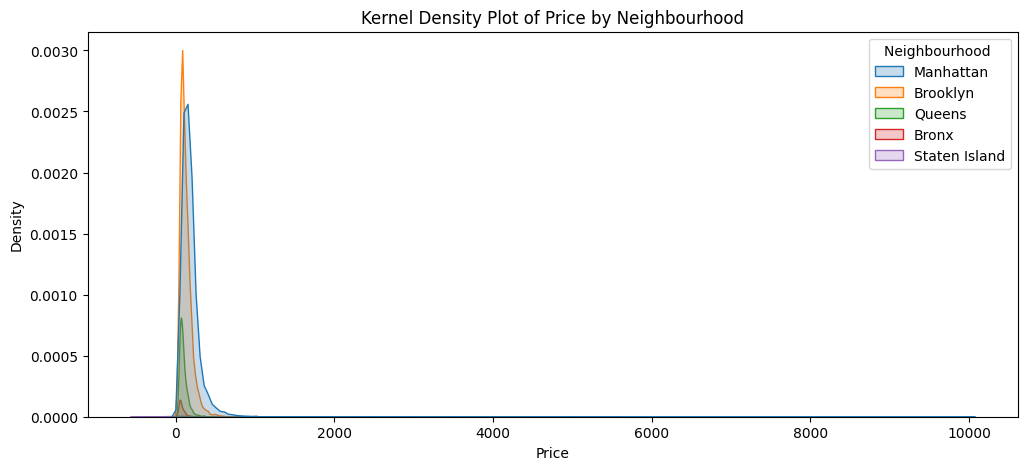

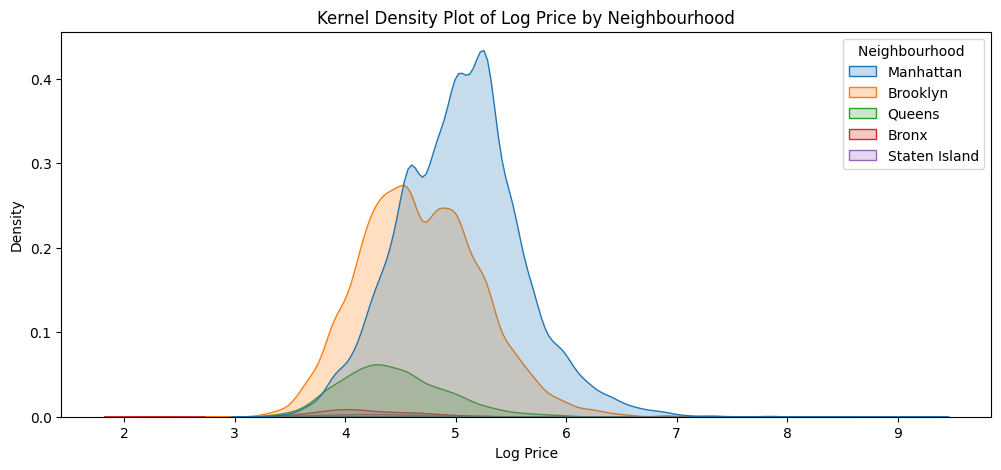

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.kdeplot(data=Q2, x='Price', hue='Neighbourhood ', fill=True)
plt.title("Kernel Density Plot of Price by Neighbourhood")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=Q2, x='Log Price', hue='Neighbourhood ', fill=True)
plt.title("Kernel Density Plot of Log Price by Neighbourhood")
plt.xlabel("Log Price")
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [6]:
# Target Variable:
y = Q2['Price']

X_d = pd.get_dummies(Q2['Neighbourhood '],dtype='int') # Create brand dummies

from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model & drop intercept
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

In [7]:
print('R-squared: ', reg.score(X_d, y)) # R squared measure
print(results)
print(Q2.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean().rename(columns={
    'Price': 'Average Price', 
    'Score': 'Average Review Score'
})
.reset_index())

R-squared:  0.04631389606035197
        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667
  Neighbourhood   Average Price  Review Scores Rating
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


What pattern do you see? 
- The coefficients are exactly the same as the average prices for corresponding neighbourhood!

What are the coefficients in a regression of a continuous variable on one categorical variable?
- They are the average dependent variable for that category! In this case, mean price for given categorical variable

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [8]:
X_d_int = pd.get_dummies(Q2['Neighbourhood '],dtype='int',drop_first=True) # Create brand dummies
reg_with_int = LinearRegression(fit_intercept=True).fit(X_d_int, y) # Fit the linear model with int
results_with_int = pd.DataFrame({
    'variable': ['intercept'] + list(reg_with_int.feature_names_in_), 
    'coefficient': [reg_with_int.intercept_] + list(reg_with_int.coef_)
})
print(results_with_int)
print(Q2.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean().rename(columns={
    'Price': 'Average Price', 
    'Score': 'Average Review Score'
})
.reset_index())

        variable  coefficient
0      intercept    75.276498
1       Brooklyn    52.470881
2      Manhattan   108.387789
3         Queens    21.580735
4  Staten Island    70.890169
  Neighbourhood   Average Price  Review Scores Rating
0          Bronx      75.276498             91.654378
1       Brooklyn     127.747378             92.363497
2      Manhattan     183.664286             91.801496
3         Queens      96.857233             91.549057
4  Staten Island     146.166667             90.843750


You need to drop the first dummy! The intercept is the average price for the Bronx. The coefficients are still the average price for corresponding Neighbourhood. Coefficients in part 2 are the same, just that Bronx mean price is in the intercept now. 

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [9]:
y[0:5]

0    549
1    149
2    250
3     90
4    270
Name: Price, dtype: int64

In [10]:
X_num = Q2.loc[:,'Review Scores Rating'] # Create feature matrix
X = pd.concat( [X_num, X_d],axis=1)

In [11]:

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                                                              random_state=65) # For replication purposes

In [12]:
from sklearn.metrics import mean_squared_error

reg2 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
results2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_}) # Regression coefficients
y_pred = reg2.predict(X_test)
r2 = reg2.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(results2)

print(f"{r2} is the r2")
print(f"{rmse} is the rmse")

               variable  coefficient
0  Review Scores Rating     1.016096
1                 Bronx   -17.990354
2              Brooklyn    33.192821
3             Manhattan    89.938768
4                Queens     3.694639
5         Staten Island    65.146603
0.029117109332053026 is the r2
194.04749432993748 is the rmse


1.016096 is the coefficient on Review Scores Rating. 

The most expensive kind of property you can rent is one in Manhattan. 

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [13]:
X_d = pd.get_dummies(Q2['Property Type'],dtype='int',drop_first=False) # Create dummies
X2 = pd.concat( [X, X_d],axis=1)


# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                                                              random_state=65) # For replication purposes

In [14]:
reg2 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
results2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_}) # Regression coefficients
y_pred = reg2.predict(X_test)
r2 = reg2.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(results2)

print(f"{r2} is the r2")
print(f"{rmse} is the rmse")

                variable  coefficient
0   Review Scores Rating     1.002221
1                  Bronx   -35.228208
2               Brooklyn    22.467930
3              Manhattan    84.234786
4                 Queens    -8.584434
5          Staten Island    40.307016
6              Apartment     5.308304
7        Bed & Breakfast   -30.638226
8                   Boat    61.698439
9               Bungalow    32.876794
10                 Cabin    40.482729
11             Camper/RV    -9.612582
12                Castle   -34.456861
13                Chalet   -22.687784
14           Condominium   107.793596
15                  Dorm   -43.249811
16                 House    36.413342
17                   Hut  -128.443536
18            Lighthouse   -83.690005
19                  Loft    68.132865
20                 Other    50.528956
21             Townhouse    83.562549
22             Treehouse   -70.429101
23                 Villa    39.607422
0.033406842115458635 is the r2
193.618331646353 is

Most expensive kind of property you can buy is a condominium. 

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

It did not change much. The coefficient means after accounting for property type and neighbourhood, for each one unit increase in review score rating, price increases by 1.0022.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  

In [15]:
cars = pd.read_csv("/Users/isaactabor/linearModels/assignment/data/cars_hw.csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [16]:
cars.drop('Unnamed: 0', axis=1, inplace=True)

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [17]:
cars['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

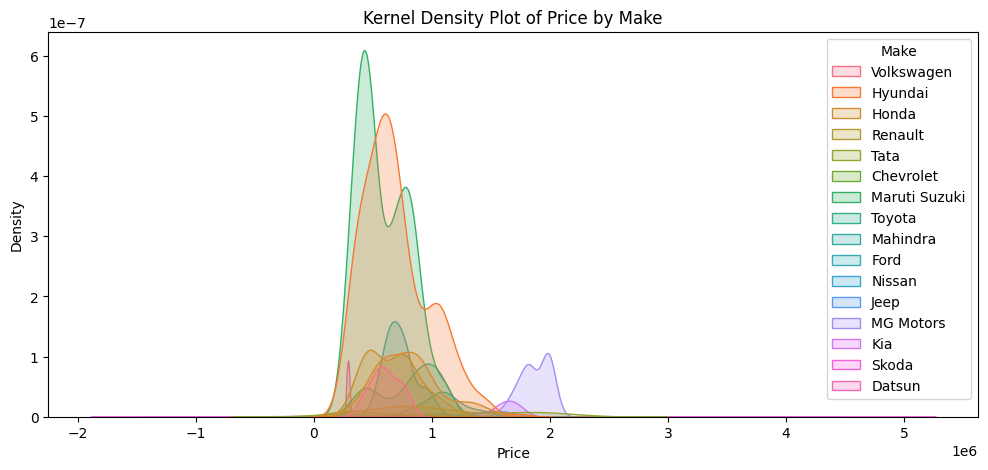

In [18]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=cars, x='Price', hue='Make', fill=True)
plt.title("Kernel Density Plot of Price by Make")
plt.xlabel("Price")
plt.show()

In [19]:
cars.groupby('Make')['Price'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Maruti Suzuki,293.0,5.887850e+05,2.160199e+05,237000.0,411000.0,527000.0,764000.0,1163000.0
Volkswagen,29.0,6.058276e+05,1.198312e+05,402000.0,542000.0,607000.0,699000.0,790000.0
Renault,68.0,6.625735e+05,2.148273e+05,287000.0,475000.0,644000.0,801000.0,1164000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Toyota,50.0,8.003400e+05,2.466900e+05,368000.0,526250.0,894000.0,1023000.0,1092000.0


MG Motors and Kia are most expensive on average. Prices are generally centered between 0 and 1 (1e6) in the Kernel Density plot. 

  3. Split the data into an 80% training set and a 20% testing set.

In [20]:
print(cars.info())
print(cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               976 non-null    object
 1   Make_Year          976 non-null    int64 
 2   Color              976 non-null    object
 3   Body_Type          976 non-null    object
 4   Mileage_Run        976 non-null    int64 
 5   No_of_Owners       976 non-null    object
 6   Seating_Capacity   976 non-null    int64 
 7   Fuel_Type          976 non-null    object
 8   Transmission       976 non-null    object
 9   Transmission_Type  976 non-null    object
 10  Price              976 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.0+ KB
None
         Make  Make_Year   Color  Body_Type  Mileage_Run No_of_Owners  \
0  Volkswagen       2017  silver      sedan        44611          1st   
1     Hyundai       2016     red  crossover        20305          1st   
2       H

In [21]:
y = cars['Price']
X = cars.drop('Price', axis=1)

# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                                                              random_state=65) # For replication purposes

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [27]:
numeric_vars = X_train.select_dtypes(include=['int64']).columns
categorical_vars = X_train.select_dtypes(exclude=['int64']).columns

X_train_numeric = X_train[numeric_vars]
X_test_numeric = X_test[numeric_vars]


In [47]:
from sklearn.metrics import r2_score, mean_squared_error


In [49]:
# Numeric Regression
model_numeric = LinearRegression(fit_intercept=True).fit(X_train_numeric, y_train)

y_train_pred_numeric = model_numeric.predict(X_train_numeric)
y_test_pred_numeric = model_numeric.predict(X_test_numeric)

# Evaluate model performance
r2_train_numeric = r2_score(y_train, y_train_pred_numeric)
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))

print(f"Numeric Model - R^2 (Train): {r2_train_numeric:.4f}, R^2 (Test): {r2_test_numeric:.4f}")
print(f"Numeric Model - RMSE (Train): {rmse_train_numeric:.4f}, RMSE (Test): {rmse_test_numeric:.4f}")

Numeric Model - R^2 (Train): 0.3111, R^2 (Test): 0.3166
Numeric Model - RMSE (Train): 306674.8003, RMSE (Test): 295400.4878


In [34]:
# Categorical Regression
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=False)  # I dropped intercept
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=False)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join="left", axis=1, fill_value=0)

cat_model = LinearRegression(fit_intercept=False).fit(X_train_cat, y_train) # Fit the linear model & drop intercept

y_train_pred_cat = cat_model.predict(X_train_cat)
y_test_pred_cat = cat_model.predict(X_test_cat)


In [36]:

r2_train_cat = r2_score(y_train, y_train_pred_cat)
r2_test_cat = r2_score(y_test, y_test_pred_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))

print(f"Categorical Model - R^2 (Train): {r2_train_cat:.4f}, R^2 (Test): {r2_test_cat:.4f}")
print(f"Categorical Model - RMSE (Train): {rmse_train_cat:.4f}, RMSE (Test): {rmse_test_cat:.4f}")

Categorical Model - R^2 (Train): 0.7609, R^2 (Test): 0.7803
Categorical Model - RMSE (Train): 180683.9876, RMSE (Test): 167505.4334


In [37]:
# Combined Regression
X_train_combined = pd.concat([X_train_numeric, X_train_cat], axis=1)
X_test_combined = pd.concat([X_test_numeric, X_test_cat], axis=1)

model_combined = LinearRegression(fit_intercept=False).fit(X_train_combined, y_train) # Fit the linear model & drop intercept

y_train_pred_combined = model_combined.predict(X_train_combined)
y_test_pred_combined = model_combined.predict(X_test_combined)


In [38]:
# Evaluate performance
r2_train_combined = r2_score(y_train, y_train_pred_combined)
r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_train_combined = np.sqrt(mean_squared_error(y_train, y_train_pred_combined))
rmse_test_combined = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))

print(f"Combined Model - R^2 (Train): {r2_train_combined:.4f}, R^2 (Test): {r2_test_combined:.4f}")
print(f"Combined Model - RMSE (Train): {rmse_train_combined:.4f}, RMSE (Test): {rmse_test_combined:.4f}")

Combined Model - R^2 (Train): 0.8517, R^2 (Test): 0.8422
Combined Model - RMSE (Train): 142275.5540, RMSE (Test): 141961.4107


**Model 1**

- Numeric Model - R^2 (Train): 0.0332, 
- R^2 (Test): 0.0531
- Numeric Model - RMSE (Train): 363307.1003, 
- RMSE (Test): 347714.9793


**Model 2**

- Categorical Model - R^2 (Train): 0.7609
-  R^2 (Test): 0.7803
- Categorical Model - RMSE (Train): 180683.9876, 
- RMSE (Test): 167505.4334


**Model 3**
- Combined Model - R^2 (Train): 0.8517, 
- R^2 (Test): 0.8422
- Combined Model - RMSE (Train): 142275.5540, 
- RMSE (Test): 141961.4107


In [42]:
f"Best was the combined model by {180683-142275} RMSE and {.8422-.7803} R2"

'Best was the combined model by 38408 RMSE and 0.061899999999999955 R2'

'Best was the combined model by 38408 RMSE and 0.061899999999999955 R2'.

It could be overfitting though

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [45]:
from sklearn.preprocessing import PolynomialFeatures


In [44]:
degree = 1  # Start at linear
r2_test = 0  # Initialize to a positive value

while r2_test >= 0:  # Loop until R^2 on the test set is negative
    # Expand numerical features
    expander = PolynomialFeatures(degree=degree, include_bias=False)
    Z_train = expander.fit_transform(X_train_numeric)
    Z_test = expander.transform(X_test_numeric)

    # Train regression model
    model = LinearRegression()
    model.fit(Z_train, y_train)

    # Predictions
    y_train_pred = model.predict(Z_train)
    y_test_pred = model.predict(Z_test)

    # Compute R^2 and RMSE
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Degree {degree}:")
    print(f"  R^2 (Train): {r2_train:.4f}, R^2 (Test): {r2_test:.4f}")
    print(f"  RMSE (Train): {rmse_train:.4f}, RMSE (Test): {rmse_test:.4f}")
    print("-" * 40)

    if r2_test < 0:
        print(f"R^2 on test set went negative at degree {degree}. Stopping loop.")
        break  # Stop the loop when R^2 becomes negative

    degree += 1  # Increase polynomial degree


Degree 1:
  R^2 (Train): 0.3111, R^2 (Test): 0.3166
  RMSE (Train): 306674.8003, RMSE (Test): 295400.4878
----------------------------------------
Degree 2:
  R^2 (Train): 0.3483, R^2 (Test): 0.3351
  RMSE (Train): 298274.7949, RMSE (Test): 291379.7548
----------------------------------------
Degree 3:
  R^2 (Train): 0.3620, R^2 (Test): 0.3394
  RMSE (Train): 295134.0925, RMSE (Test): 290436.7524
----------------------------------------
Degree 4:
  R^2 (Train): 0.3713, R^2 (Test): 0.3392
  RMSE (Train): 292969.2531, RMSE (Test): 290483.5797
----------------------------------------
Degree 5:
  R^2 (Train): 0.3567, R^2 (Test): 0.3229
  RMSE (Train): 296350.7949, RMSE (Test): 294032.9851
----------------------------------------
Degree 6:
  R^2 (Train): 0.3521, R^2 (Test): 0.3145
  RMSE (Train): 297418.0795, RMSE (Test): 295851.4861
----------------------------------------
Degree 7:
  R^2 (Train): 0.3504, R^2 (Test): 0.3180
  RMSE (Train): 297808.1084, RMSE (Test): 295094.9313
------------

Highest R^2 was Degree 3 with R^2 of .3111, which was way better than my numeric one in previous part of .05, but worse than combined model 



  

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

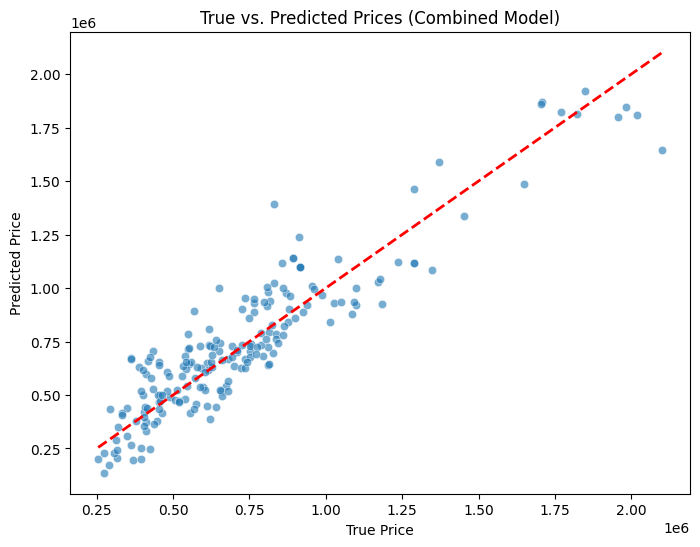

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: True vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_combined, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal reference line
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True vs. Predicted Prices (Combined Model)")
plt.show()


Yes, they roughly line up with diagonal. 

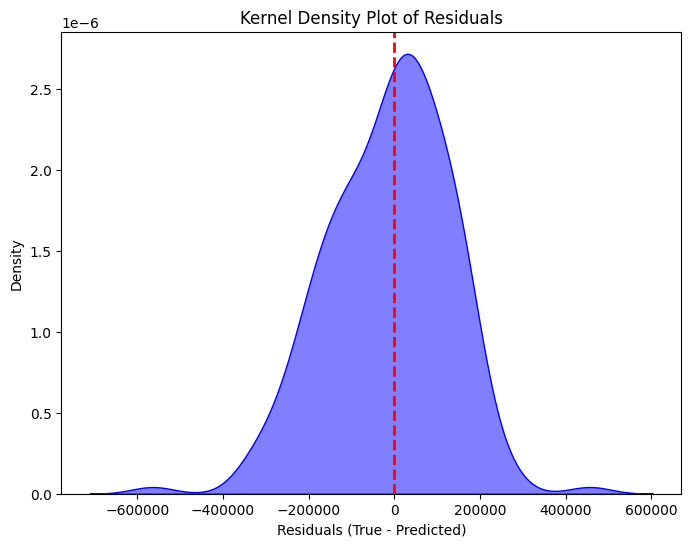

In [51]:
# Compute residuals
residuals = y_test - y_test_pred_combined

# KDE Plot of residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True, color="blue", alpha=0.5)
plt.axvline(0, color='red', linestyle='--', lw=2)  # Zero error reference line
plt.xlabel("Residuals (True - Predicted)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()


Yes, roughly bell-shaped around 0.

Strengths:
- high R^2, low RSME

Weaknesses:
- has lots of variables, so possibly overfitting

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
